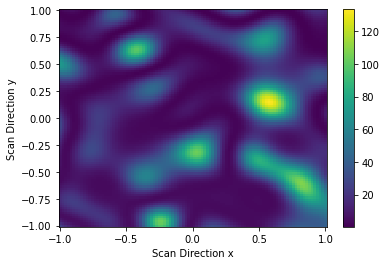

In [1]:
import orqviz
import numpy as np
np.random.seed(42)

def loss_function(pars):
    return np.sum(np.cos(pars))**2 + np.sum(np.sin(30*pars))**2

n_params = 42
params = np.random.uniform(-np.pi, np.pi, size=n_params)
dir1 = orqviz.geometric.get_random_normal_vector(n_params)
dir2 = orqviz.geometric.get_random_orthonormal_vector(dir1)

scan2D_result = orqviz.scans.perform_2D_scan(params, loss_function,
                                direction_x=dir1, direction_y=dir2,
                                n_steps_x=100)
orqviz.scans.plot_2D_scan_result(scan2D_result)

In [2]:
def vis_p2_landscape_by_PCA(params, loss_function):
    from orqviz.pca import get_pca, perform_2D_pca_scan, plot_pca_landscape, plot_optimization_trajectory_on_pca
    
    parameter_trajectory = params
    pca_object = get_pca(parameter_trajectory)
    pca_scan_result = perform_2D_pca_scan(pca_object, loss_function)
    plot_pca_landscape(pca_scan_result, pca_object)
    plot_optimization_trajectory_on_pca(parameter_trajectory, pca_object)

bounds:  {'beta': [-0.7853981633974483, 0.7853981633974483], 'gamma': [-0.7853981633974483, 0.7853981633974483]}
n_pts:  {'beta': 56, 'gamma': 56}
n_pts_per_unit:  36



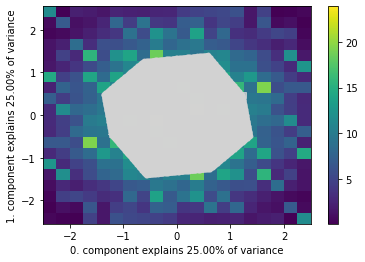

In [3]:
import itertools
def PCA_p2_landscape():
    p = 2
    bounds = {'beta': [-np.pi/4, np.pi/4],
                'gamma': [-np.pi/4, np.pi/4]}
    # n_shots: int=2048
    n_pts_per_unit = 36

    n_pts = {}
    # n_samples = {}
    for label, bound in bounds.items():
        bound_len = bound[1] - bound[0]
        n_pts[label] = np.floor(n_pts_per_unit * bound_len).astype(int)
        # n_samples[label] = np.ceil(n_pts_per_unit * bound_len * sampling_frac).astype(int)
    
    print('bounds: ', bounds)
    print('n_pts: ', n_pts)
    # print('n_samples: ', n_samples)
    # print('alpha: ', alpha)
    print('n_pts_per_unit: ', n_pts_per_unit)
    # sample P points from N randomly

    full_range = {
        'gamma': np.linspace(bounds['gamma'][0], bounds['gamma'][1], n_pts['gamma']),
        'beta': np.linspace(bounds['beta'][0], bounds['beta'][1], n_pts['beta'])
    }

    # in order of beta1 beta2 gamma1 gamma2
    full_ranges = []
    for ip in range(p):
        full_ranges.append(full_range['beta'].copy())
    
    for ip in range(p):
        full_ranges.append(full_range['gamma'].copy())

    params = []
    # former 2 are betas, latter 2 are gammas
    for beta2_gamma2 in itertools.product(*full_ranges):
        param = beta2_gamma2
        params.append(param)

    vis_p2_landscape_by_PCA(params, loss_function)

PCA_p2_landscape()